# Micro-narrative analysis of _The Lord of the Rings_

In [1]:
import glob
import os.path

docs = []
for file in glob.glob("input/*.txt"):
    with open(file) as f:
        text = f.read()
        sections = text.split("\n")
        for section in sections:
            section = section.strip()
            if section:
                docs.append(section)

In [2]:
from narrativegraphs import CooccurrenceGraph

if os.path.exists("lotr.db"):
    model = CooccurrenceGraph.load("lotr.db")
else:
    model = CooccurrenceGraph(
        sqlite_db_path="lotr.db",
        on_existing_db="overwrite",
        n_cpu=1
    ).fit(docs)

In [4]:
model.cooccurrences_

,id,entity_one,entity_one_frequency,entity_two,entity_two_frequency,frequency,doc_frequency,spread,adjusted_tf_idf,pmi,entity_one_id,entity_two_id
0,1,Three Rings,36,elven,340,1,1,0.000108,0.0,1.834190,1,2
1,2,Three Rings,36,The sky,1494,1,1,0.000108,0.0,1.191318,1,3
2,3,elven,340,The sky,1494,2,2,0.000216,3080.0,0.517172,2,3
3,4,Dwarf,771,Hal,974,4,4,0.000433,5544.0,0.648418,4,5
4,5,Darkness,8600,Darkness,8600,44,41,0.004437,9460.0,-0.303573,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
284326,284327,Rose,93,little Elanor,18,1,1,0.000108,0.0,2.698216,7886,16133
284327,284328,his lap,100,Rose,93,1,1,0.000108,0.0,1.953488,7812,7886
284328,284329,his chair,245,little Elanor,18,1,1,0.000108,0.0,2.277533,2167,16133
284329,284330,his chair,245,his lap,100,1,1,0.000108,0.0,1.532805,2167,7812


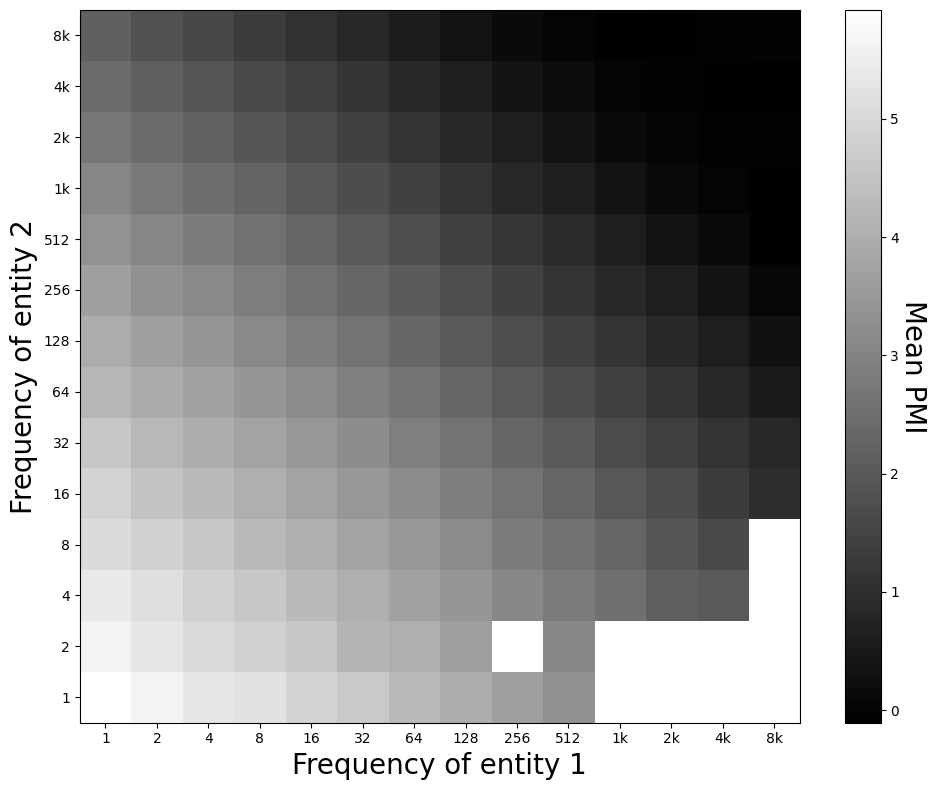

In [4]:
from sharedutils import visualize_pmi_by_frequency

visualize_pmi_by_frequency(model.cooccurrences_)

In [3]:
from narrativegraphs import GraphFilter

graph_filter = GraphFilter(
    minimum_edge_frequency=2,
    minimum_node_frequency=3,
    maximum_node_frequency=100,
    maximum_edge_doc_frequency=20
)

In [5]:
comms = model.graph.find_communities(
    graph_filter=graph_filter,
    min_weight=1,
    community_detection_method_args=dict(k=3)
)

for comm in sorted(comms, key=lambda c: c.score, reverse=True):
    if len(comm.members) < 2: continue
    print(*[e.label for e in comm.members], sep=", ")
    contexts = model.tuplets.get_contexts_by_entity_ids(comm.member_ids)
    for context in contexts:
        context.print_with_ansi_highlight()
    # tuplets = model.tuplets.get_by_entity_ids(comm.member_ids)
    # print(*sorted({(t.context.doc_id, t.context.doc_offset, t.context.text) for t in tuplets}, key=lambda x: x[0:2]), sep="\n")
    print()

the mission, the last defences, The third part

Staddle, Bree-hill, Combe

O Orofarnë, Lassemista, Carnimírië

the hiss, The thieves, the filthy little thieves, my precious

Brand, the fern, the turves

Gwaihir, Landroval, Meneldor

three somewhat different breeds, Stoors, Fallohides, Harfoots

Gibbets, their brats, a thatched barn

Finglas, Fladrif, only myself, Skinbark, Leaflock, much use

two leaves, steaming water, the bowls

Valimar, Varda, Kindler, Mount Everwhite, the foaming waves

Toby, Hornblowers, Longbottom, his garden

Hornblowers, Grubbs, Chubbs, Burrowses, Bolgers, BRACEGIRDLE, Brockhouse

my fear, the deadly pursuit, the cunning, many calls, my letters, a fat man, my hope

gaping rents, the crag, old weathered stone, his load, a bend, black stone, small pieces

their coming, my notes, many enquiries, additional appendices, the production, the accessory volume, the material, the original edition, particular more detailed linguistic information, the meantime, this editio

In [21]:
comms = model.graph.find_communities(
    graph_filter=graph_filter,
    community_detection_method="louvain",
    min_weight=1,
    community_detection_method_args=dict(resolution=4)
)
for comm in sorted(comms, key=lambda c: c.score, reverse=True):
    if len(comm.members) < 2: continue
    members = [e.label for e in comm.members]
    print(*members, sep=", ")
    tuplets = model.tuplets.get_by_entity_ids(comm.member_ids)
    print(*sorted({(t.context.doc_id, t.context.doc_offset, t.context.text) for t in tuplets}, key=lambda x: x[0:2]), sep="\n")
    print()

Greenfields, 1147
(37, 247, "The last battle, before this story opens, and indeed the only one that had ever been fought within the borders of the Shire, was beyond living memory: the Battle of Greenfields, S.R. 1147, in which Bandobras Took routed an invasion of Orcs. Even the weathers had grown milder, and the wolves that had once come ravening out of the North in bitter white winters were now only a grandfather's tale. So, though there was still some store of weapons in the Shire, these were used mostly as trophies, hanging above hearths or on walls, or gathered into the museum at Michel Delving. The Mathom-house it was called; for anything that Hobbits had no immediate use for, but were unwilling to throw away, they called a _mathom_.")
(9081, 439, 'So ended the Battle of Bywater, 1419, the last battle fought in the Shire, and the only battle since the Greenfields, 1147, away up in the Northfarthing. In consequence, though it happily cost very few lives, it has a chapter to itself 

In [7]:
# create server to be viewed in own browser which blocks execution of other cells
model.serve_visualizer()

INFO:     Started server process [16390]
INFO:     Waiting for application startup.
INFO:root:Database engine provided to state before startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8001 (Press CTRL+C to quit)


INFO:     127.0.0.1:58515 - "GET / HTTP/1.1" 304 Not Modified
INFO:     127.0.0.1:58515 - "GET /static/js/main.a230418a.js HTTP/1.1" 304 Not Modified
INFO:     127.0.0.1:58516 - "GET /static/css/main.8226d438.css HTTP/1.1" 200 OK
INFO:     127.0.0.1:58518 - "GET /graph/bounds/cooccurrence HTTP/1.1" 200 OK
INFO:     127.0.0.1:58518 - "OPTIONS /graph HTTP/1.1" 200 OK
INFO:     127.0.0.1:58518 - "POST /graph HTTP/1.1" 200 OK
INFO:     127.0.0.1:58531 - "OPTIONS /entities/search/gibbets HTTP/1.1" 200 OK
INFO:     127.0.0.1:58531 - "GET /entities/search/gibbets HTTP/1.1" 200 OK
INFO:     127.0.0.1:58531 - "POST /graph HTTP/1.1" 200 OK
INFO:     127.0.0.1:58539 - "GET /entities/10225 HTTP/1.1" 200 OK
INFO:     127.0.0.1:58539 - "GET /entities/10225/docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:58547 - "GET /cooccurrences/161826 HTTP/1.1" 200 OK
INFO:     127.0.0.1:58547 - "GET /cooccurrences/161826/docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:58564 - "GET /entities/10233 HTTP/1.1" 200 OK
INFO:     

INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [16390]
INFO:root:Server stopped by user
